This is the notebook of kaggle competition "House Prices - Advanced Regression Techniques"

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description

In [31]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow import keras
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
print(keras.__version__)
import tensorflow
print(tensorflow.__version__)

2.7.0
2.7.0


In [32]:
from tensorflow.keras.layers.experimental import preprocessing

In [33]:
import pandas as pd

def load_digits_data(digits_path='data'):
    train_csv_path = os.path.join(digits_path, "train.csv")
    test_csv_path = os.path.join(digits_path, "test.csv")
    return pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)

train, test = load_digits_data()

In [34]:
num_classes = 10
input_shape = (28, 28, 1)

In [35]:
y_train = train['label']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = train.iloc[:, 1:]
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
train = X_train_scaled.reshape(X_train_scaled.shape[0],28,28,1)
test_scaled = scaler.transform(test.astype(np.float64))
test = test_scaled.reshape(test_scaled.shape[0],28,28,1)

In [37]:
y_binary = to_categorical(y_train.values)

In [68]:
model = keras.Sequential([
    layers.InputLayer(input_shape=[28, 28, 1]),
    
#     preprocessing.RandomContrast(factor=0.10),
#     preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),
    
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax'),
])


In [69]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_6 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

In [70]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

In [71]:
batch_size = 128
epochs = 50

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train, y_binary, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
295/296 [============================>.] - ETA: 0s - loss: 1.7236 - categorical_accuracy: 0.4067WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff34c2480e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBO

296/296 [==============================] - 47s 160ms/step - loss: 0.0409 - categorical_accuracy: 0.9876 - val_loss: 0.0260 - val_categorical_accuracy: 0.9917
Epoch 39/50
296/296 [==============================] - 19s 66ms/step - loss: 0.0396 - categorical_accuracy: 0.9883 - val_loss: 0.0246 - val_categorical_accuracy: 0.9933
Epoch 40/50
296/296 [==============================] - 20s 67ms/step - loss: 0.0361 - categorical_accuracy: 0.9890 - val_loss: 0.0249 - val_categorical_accuracy: 0.9924
Epoch 41/50
296/296 [==============================] - 19s 66ms/step - loss: 0.0352 - categorical_accuracy: 0.9896 - val_loss: 0.0254 - val_categorical_accuracy: 0.9917
Epoch 42/50
296/296 [==============================] - 20s 67ms/step - loss: 0.0365 - categorical_accuracy: 0.9887 - val_loss: 0.0230 - val_categorical_accuracy: 0.9926
Epoch 43/50
296/296 [==============================] - 30s 102ms/step - loss: 0.0377 - categorical_accuracy: 0.9890 - val_loss: 0.0246 - val_categorical_accuracy: 0.9

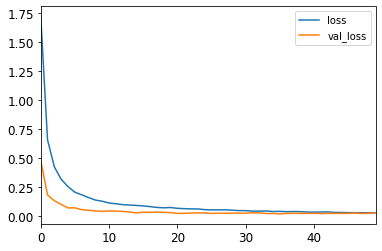

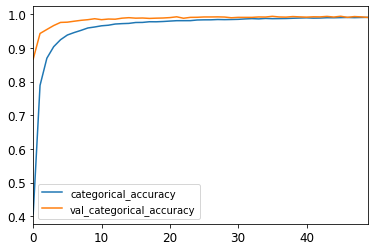

In [72]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot()

In [73]:
predictions = model.predict(test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [74]:
predictions_cat = predictions.argmax(axis=1)

In [75]:
predictions_cat.shape

(28000,)

In [76]:
sub = pd.DataFrame({'ImageId': list(range(1, len(predictions_cat)+1)), 'Label': predictions_cat})
sub.shape

(28000, 2)

In [77]:
sub.to_csv("data/submission_script09_dl_data_augmentation_2.csv", index=False)